In [ ]:
# install packages
!pip install -U openai-whisper
!pip install opencc-python-reimplemented

In [20]:
# load speech2text model
import whisper
from opencc import OpenCC
model = whisper.load_model("medium")

In [21]:
# example
result = model.transcribe("output_audio_12/chatgpt/2_MixDown.wav")
print(result["text"])

就是經過轉變性 遼闊的財前中風處理童話新牛連結 撫匪時差那瞬間


In [27]:
traditional_to_simplified(result["text"]).replace(" ","")

'就是经过转变性辽阔的财前中风处理童话新牛连结抚匪时差那瞬间'

In [4]:
# find directories of 6 systems
import os

def get_directories(path):
    directories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    return directories

# Replace 'folder_path' with the path of the folder you want to search
folder_path = 'output_audio_12'
directories_in_folder = get_directories(folder_path)

print("Directories in the folder:")
for directory in directories_in_folder:
    print(directory)


Directories in the folder:
chatgpt
.ipynb_checkpoints
smbart_less_blc
smbart
songnet
mt-based
smbart_more_blc


In [43]:
# extract wav into a list

import os

def get_directories(path):
    directories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    return directories

def get_wav_files_in_directory(directory_path):
    wav_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.wav')]
    return wav_files

# Replace 'folder_path' with the path of the folder you want to search
folder_path = 'output_audio_12'
directories_in_folder = get_directories(folder_path)

wav_files_list = []
for directory in directories_in_folder:
    directory_path = os.path.join(folder_path, directory)
    wav_files_list.extend(get_wav_files_in_directory(directory_path))

print("WAV files found:")
# for wav_file in wav_files_list:
#     print(wav_file)


WAV files found:


In [22]:
# the results of speech recognition are written in Traditional Chinese
# Convert results into simplified ones

def traditional_to_simplified(traditional_text):
    cc = OpenCC('t2s')  # 't2s' for traditional to simplified conversion
    simplified_text = cc.convert(traditional_text)
    return simplified_text

In [14]:
wav_transcribe = dict()
for wav_file in wav_files_list:
    wav_file_p = wav_file.split("/")
    tmp = wav_file_p[1] + "+" + wav_file_p[-1].split("_")[0]
    wav_transcribe[tmp] = str()
    result = model.transcribe(wav_file)
    wav_transcribe[tmp] = traditional_to_simplified(result["text"]).replace(" ","")
    print(wav_file, wav_transcribe[tmp])

output_audio_12/chatgpt/5_MixDown.wav 由长光影春秋年花下动生命翻城灵动月飞长柔缤纷色彩炫光眼照天空身体强健柔韧灵活力
output_audio_12/chatgpt/11_MixDown.wav 感觉莫辞心动寂静梦想如影随心游眼里沉默了离别路雨眼睛心点闪烁光
output_audio_12/chatgpt/8_MixDown.wav 青春时光流转看头梦的边爱情绕指尖缠绵绵画的卷蝴蝶翩翩舞动彩色的空中月亮情之肉轻盈怀香
output_audio_12/chatgpt/7_MixDown.wav 承诺与言行心手有地心系感情似西红沉浸飞无心陷流手心握紧踏实惊心放松小翅膀飞像自由蓝天空
output_audio_12/chatgpt/1_MixDown.wav 历经沧浪轻易孤岛流拥动深藏轻易灯火闪烁车潮草杂刚强健人肩膀住
output_audio_12/chatgpt/3_MixDown.wav 沉醉光影心神已换其往日时光留存归眼望回应在清禅迈示行尽路记事不
output_audio_12/chatgpt/2_MixDown.wav 故事里的故事很美世界变得更辽阔电话响了你又接了谁流星划过天际
output_audio_12/chatgpt/4_MixDown.wav 曲土片当初解放正南朝前知应道被眼影立碑网膜广阔天空轻拉笔展
output_audio_12/chatgpt/10_MixDown.wav 缘分相聚绵绵线上千圈练习里勇气舍得担当风雨白云有燃自在飘舞天空辣天际云飞向遥
output_audio_12/chatgpt/6_MixDown.wav 真实里缘因离不有缘无光阴流转时刻碎念承担护福建世平台北同心春阵灵动活泼
output_audio_12/chatgpt/9_MixDown.wav 笑容一抹春风温润生活逝去这旅程玫瑰绽放方向芬芳飘散太阳温暖照耀大地鸣
output_audio_12/chatgpt/12_MixDown.wav 人生曲折看风孤路青青栖啦拨恋情感深阳光灿烂男男自扬心微笑满容春风柔
output_audio_12/smbart_less_blc/9_MixDown.wav 谁的模样谁的笑容面对著邪恶生活玫瑰花谢了能把谁挽留别再哭看那太阳落了
output_audio_12/smbart_less_blc/1

In [21]:
model_lst = set()
with open("audio2text_6_systems.txt","w") as fout:
    fout.write("melody" + "\t" + "system" + "\t" + "recognized_text" + "\n")
    for sys, text in wav_transcribe.items():
        sys  = sys.split("+")
        model,melody_idx = sys[0],sys[1]
        fout.write(melody_idx + "\t" + model + "\t" + text + "\n")
        model_lst.add(model)
    

In [42]:
model_lst = ["chatgpt","smbart_less_blc","smbart","songnet","mt-based","smbart_more_blc"]
audio2text = {key:{str(m): str() for m in range(1,13)} for key in model_lst}

with open("audio2text_6_systems.txt","r") as fin:
    for line in fin.readlines()[1:]:
        line = line.strip()
        line = line.split("\t")
        melody,sys = line[0],line[1]
        audio2text[sys][melody] = line[2]

In [43]:
audio2text

{'chatgpt': {'1': '历经沧浪轻易孤岛流拥动深藏轻易灯火闪烁车潮草杂刚强健人肩膀住',
  '2': '就是经过U转变性辽阔的财前中风处理童话新牛连结抚匪时差那瞬间',
  '3': '沉醉光影心神已换其往日时光留存归眼望回应U在清禅迈示行尽路记事不',
  '4': '曲U土片当初解放正南朝前知应道被眼影立碑网膜广阔天空轻拉笔展',
  '5': '由长光影春秋年花下动生命翻城灵动月飞长柔缤纷色彩炫光眼照天空身体强健柔韧灵活力',
  '6': '真实里缘因离不有缘无光阴流转时刻碎念承担护福建世平台北同心春阵灵动活泼',
  '7': '承诺与言行心手有地心系感情似西红沉浸飞无心陷流手心握紧踏实惊心放松小翅膀飞像自由蓝天空',
  '8': '青春时光流转看头梦的边爱情绕指尖缠绵绵画的卷蝴蝶翩翩舞U动彩色的空中月亮情之肉轻盈怀香',
  '9': '笑容一抹春风温润生活逝去这旅程玫瑰绽放方向芬芳飘散太阳温暖照耀大地鸣',
  '10': '缘分相聚绵绵线上千圈练习里勇气舍得担当风雨白云有燃自在飘舞天空辣天际云飞向遥',
  '11': '感觉莫辞心动寂静梦想如影随心游眼里沉默了离别路雨眼睛心点闪烁光',
  '12': '人生曲折看风孤路青青栖啦拨恋情感深阳光灿烂男男自扬心微笑满容春风柔'},
 'smbart_less_blc': {'1': '没留下一句话是结局却又埋在心底从城市到山那一边UUUU难难忍',
  '2': '故事完了还没续集让爱从眼前走来还没和你通电话以前流星划下来了',
  '3': '让坚强的回忆飞让所有人都在记忆里拍几张还留着照片没有谁能跟出脚步',
  '4': '能陪你到任何地方每方向又遇到谁谁人躲在背影旁蓝天五彩的梦里有',
  '5': '岁月蹉跎谁人能读懂懂生命之长途何时能来得风风雨雨陪我走过彩虹而快来摸摸我的身体',
  '6': '却又毫无能和你的理由随时间变得好冷漠让它停泊于我们肩膀像一个孤独的孩子',
  '7': '还没来得及和别人的承诺是谁放不下这无情的结感情谁人能抚平谁手心的伤疤让我为你插上翅膀飞',
  '8': '别再让那不为人人而青春别再让那不为人值得爱情谁能明白谁能让谁变成蝴蝶你看那弯弯的月亮啊',
  '9': '谁的模样谁的笑容面对著邪恶生活玫瑰花谢了能把谁挽留别再哭看那太阳落了',
 

In [44]:
model_lst

['chatgpt',
 'smbart_less_blc',
 'smbart',
 'songnet',
 'mt-based',
 'smbart_more_blc']

In [45]:
generated_text = {key:{str(m): str() for m in range(1,13)} for key in model_lst}


with open("6_systems_output.csv","r") as fin:
    for line in fin.readlines()[1:]:
        line = line.strip()
        line = line.split(",")
        melody,length, keyword, chatgpt,mt_based,songnet,sm3,less_blc,more_blc = line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8]
        generated_text["smbart_more_blc"][melody] += more_blc
        generated_text["mt-based"][melody] += mt_based
        generated_text["songnet"][melody] += songnet
        generated_text["smbart"][melody] += sm3
        generated_text["chatgpt"][melody] += chatgpt
        generated_text["smbart_less_blc"][melody] += less_blc
        

In [46]:
def two_strings_diff(s1,s2):
    count = 0
    
    if len(s1) == len(s2):
        for i in range(len(s1)):
            if s1[i] == s2[i]:
                count += 1
        return count/len(s1)
    else:
        print("The lenght of two strings are different!")
        return False

In [47]:
two_strings_diff(generated_text["chatgpt"]["1"],audio2text["chatgpt"]["1"])

0.6666666666666666

In [48]:
audio2text["chatgpt"]["1"]

'历经沧浪轻易孤岛流拥动深藏轻易灯火闪烁车潮草杂刚强健人肩膀住'

In [49]:
speech2text_score = {key:[] for key in model_lst}

for k in generated_text.keys():
    for i in range(1, 13):
        truth = generated_text[k][str(i)].replace(" ","")
        predict = audio2text[k][str(i)]
        score = two_strings_diff(truth,predict)
        if score:
            print(k, i, score)
            speech2text_score[k].append(score)
        else:
            print(k, i, len(truth), len(predict))
            print(truth)
            print(predict)


chatgpt 1 0.6666666666666666
chatgpt 2 0.4
chatgpt 3 0.53125
chatgpt 4 0.4
chatgpt 5 0.7435897435897436
chatgpt 6 0.6
chatgpt 7 0.6046511627906976
chatgpt 8 0.813953488372093
chatgpt 9 0.8235294117647058
chatgpt 10 0.7631578947368421
chatgpt 11 0.7419354838709677
chatgpt 12 0.6060606060606061
smbart_less_blc 1 0.7666666666666667
smbart_less_blc 2 1.0
smbart_less_blc 3 0.9375
smbart_less_blc 4 0.9333333333333333
smbart_less_blc 5 0.9743589743589743
smbart_less_blc 6 1.0
smbart_less_blc 7 1.0
smbart_less_blc 8 0.9534883720930233
smbart_less_blc 9 0.9117647058823529
smbart_less_blc 10 0.8421052631578947
smbart_less_blc 11 0.967741935483871
smbart_less_blc 12 0.9696969696969697
smbart 1 0.9
smbart 2 0.7333333333333333
smbart 3 1.0
smbart 4 0.9333333333333333
smbart 5 0.9487179487179487
smbart 6 0.9428571428571428
smbart 7 0.9302325581395349
smbart 8 1.0
smbart 9 0.9411764705882353
smbart 10 0.9210526315789473
smbart 11 0.967741935483871
smbart 12 0.9090909090909091
songnet 1 1.0
songnet 2 

In [57]:
for sys, scores in speech2text_score.items():
    print(sys,sum(scores)/len(scores))

chatgpt 0.6412328714876936
smbart_less_blc 0.9380546850560906
smbart 0.9272946885936046
songnet 0.9779357829653493
mt-based 0.9765999421580052
smbart_more_blc 0.9590805713070424


In [50]:
with open("auto_whisper_score.txt","w") as fout:
    fout.write("system" + "\t" + "\t".join([str(x) for x in range(1,13)]) + "\n")
    for syn, intell_score in speech2text_score.items():
        fout.write(syn + "\t" + "\t".join([str(x) for x in intell_score]) + "\n")
    

In [51]:
!head auto_whisper_score.txt

system	1	2	3	4	5	6	7	8	9	10	11	12
chatgpt	0.6666666666666666	0.4	0.53125	0.4	0.7435897435897436	0.6	0.6046511627906976	0.813953488372093	0.8235294117647058	0.7631578947368421	0.7419354838709677	0.6060606060606061
smbart_less_blc	0.7666666666666667	1.0	0.9375	0.9333333333333333	0.9743589743589743	1.0	1.0	0.9534883720930233	0.9117647058823529	0.8421052631578947	0.967741935483871	0.9696969696969697
smbart	0.9	0.7333333333333333	1.0	0.9333333333333333	0.9487179487179487	0.9428571428571428	0.9302325581395349	1.0	0.9411764705882353	0.9210526315789473	0.967741935483871	0.9090909090909091
songnet	1.0	0.9	1.0	0.9666666666666667	1.0	1.0	0.9534883720930233	0.9767441860465116	0.9705882352941176	1.0	0.967741935483871	1.0
mt-based	0.9666666666666667	1.0	0.96875	1.0	0.9743589743589743	0.9428571428571428	0.9534883720930233	1.0	1.0	0.9736842105263158	1.0	0.9393939393939394
smbart_more_blc	0.9333333333333333	0.9	0.90625	1.0	1.0	1.0	0.9767441860465116	0.8837209302325582	0.9411764705882353	1.0	0.967741935

In [87]:
from mlxtend.evaluate import permutation_test

def significance_test(lst1,lst2):
    p_value = permutation_test(lst1,lst2,method='approximate',num_rounds=10000,seed=0)
    return p_value

In [89]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 8.1 MB/s eta 0:00:00ta 0:00:01


In [58]:
speech2text_score

{'chatgpt': [0.6666666666666666,
  0.4,
  0.53125,
  0.4,
  0.7435897435897436,
  0.6,
  0.6046511627906976,
  0.813953488372093,
  0.8235294117647058,
  0.7631578947368421,
  0.7419354838709677,
  0.6060606060606061],
 'smbart_less_blc': [0.7666666666666667,
  1.0,
  0.9375,
  0.9333333333333333,
  0.9743589743589743,
  1.0,
  1.0,
  0.9534883720930233,
  0.9117647058823529,
  0.8421052631578947,
  0.967741935483871,
  0.9696969696969697],
 'smbart': [0.9,
  0.7333333333333333,
  1.0,
  0.9333333333333333,
  0.9487179487179487,
  0.9428571428571428,
  0.9302325581395349,
  1.0,
  0.9411764705882353,
  0.9210526315789473,
  0.967741935483871,
  0.9090909090909091],
 'songnet': [1.0,
  0.9,
  1.0,
  0.9666666666666667,
  1.0,
  1.0,
  0.9534883720930233,
  0.9767441860465116,
  0.9705882352941176,
  1.0,
  0.967741935483871,
  1.0],
 'mt-based': [0.9666666666666667,
  1.0,
  0.96875,
  1.0,
  0.9743589743589743,
  0.9428571428571428,
  0.9534883720930233,
  1.0,
  1.0,
  0.9736842105263

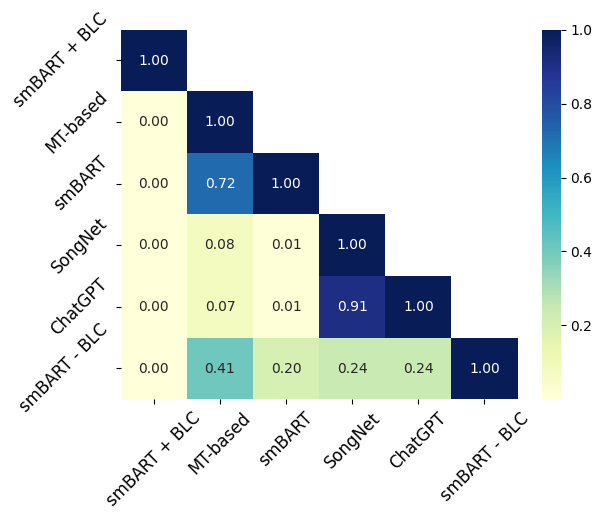

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.evaluate import permutation_test
import numpy as np

# Your dictionary of lists
data = speech2text_score  # Replace this with your dictionary

# Function for permutation test
def significance_test(lst1, lst2):
    p_value = permutation_test(lst1, lst2, method='approximate', num_rounds=10000, seed=0)
    return p_value

# Compute permutation test for each pair of lists in the dictionary
results = {}
for k1, v1 in data.items():
    results_row = []
    for k2, v2 in data.items():
        p_value = significance_test(v1, v2)
        results_row.append(p_value)
    results[k1] = results_row

list_names = ["smBART + BLC","MT-based","smBART","SongNet","ChatGPT","smBART - BLC"]

# Create a DataFrame from the results
df = pd.DataFrame(results, index=data.keys())

# Mask values strictly above the diagonal
mask = np.triu(np.ones(df.shape), k=1).astype(bool)
df = df.mask(mask)

# Plot heatmap
sns.heatmap(df, annot=True, fmt=".2f", cmap='YlGnBu')

# Set labels for each axis
plt.xticks(np.arange(len(list_names)) + 0.5, list_names, rotation=45, fontsize=12)
plt.yticks(np.arange(len(list_names)) + 0.5, list_names, rotation=45, fontsize=12)


# Save the plot as an image (e.g., PNG, PDF, SVG, etc.)
plt.savefig('significance_whisper.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()





In [29]:
with open("audio2text_6_systems.txt","w") as fout:
    fout.write("melody" + "\t" + "system" + "\t" + "recognized_text" + "\n")
    for system, res in wav_transcribe.items():
        tmp = extract_numbers(system) + "\t" +extract_letters_and_punctuation(system) + "\t" + res + "\n"
        fout.write(tmp)

In [30]:
!head audio2text_6_systems.txt

melody	system	recognized_text
5	chatgpt	由长光影春秋年花下动生命翻城灵动月飞长柔缤纷色彩炫光眼照天空身体强健柔韧灵活力
11	chatgpt	感觉莫辞心动寂静梦想如影随心游眼里沉默了离别路雨眼睛心点闪烁光
8	chatgpt	青春时光流转看头梦的边爱情绕指尖缠绵绵画的卷蝴蝶翩翩舞动彩色的空中月亮情之肉轻盈怀香
7	chatgpt	承诺与言行心手有地心系感情似西红沉浸飞无心陷流手心握紧踏实惊心放松小翅膀飞像自由蓝天空
1	chatgpt	历经沧浪轻易孤岛流拥动深藏轻易灯火闪烁车潮草杂刚强健人肩膀住
3	chatgpt	沉醉光影心神已换其往日时光留存归眼望回应在清禅迈示行尽路记事不
2	chatgpt	故事里的故事很美世界变得更辽阔电话响了你又接了谁流星划过天际
4	chatgpt	曲土片当初解放正南朝前知应道被眼影立碑网膜广阔天空轻拉笔展
10	chatgpt	缘分相聚绵绵线上千圈练习里勇气舍得担当风雨白云悠然自在飘舞天空拉天际云飞向摇


In [18]:
wav_transcribe

{'chatgpt5': '由长光影春秋年花下动生命翻城灵动月飞长柔缤纷色彩炫光眼照天空身体强健柔韧灵活力',
 'chatgpt11': '感觉莫辞心动寂静梦想如影随心游眼里沉默了离别路雨眼睛心点闪烁光',
 'chatgpt8': '青春时光流转看头梦的边爱情绕指尖缠绵绵画的卷蝴蝶翩翩舞动彩色的空中月亮情之肉轻盈怀香',
 'chatgpt7': '承诺与言行心手有地心系感情似西红沉浸飞无心陷流手心握紧踏实惊心放松小翅膀飞像自由蓝天空',
 'chatgpt1': '历经沧浪轻易孤岛流拥动深藏轻易灯火闪烁车潮草杂刚强健人肩膀住',
 'chatgpt3': '沉醉光影心神已换其往日时光留存归眼望回应在清禅迈示行尽路记事不',
 'chatgpt2': '故事里的故事很美世界变得更辽阔电话响了你又接了谁流星划过天际',
 'chatgpt4': '曲土片当初解放正南朝前知应道被眼影立碑网膜广阔天空轻拉笔展',
 'chatgpt10': '缘分相聚绵绵献上千千恋系利用其舍得担当风雨白云悠然自在飘舞天空啦天际云飞向遥',
 'chatgpt6': '真实里缘因离不有缘无光阴流转时刻碎念承担护福建世平台北同心春阵灵动活泼',
 'chatgpt9': '笑容一抹春风温润生活逝去这旅程玫瑰绽放方向芬芳飘散太阳温暖照耀大地鸣',
 'chatgpt12': '人生曲折看风孤路青青栖啦拨恋情感深阳光灿烂男男自扬心微笑满容春风柔',
 'smbart_less_blc9': '谁的模样谁的笑容面对著邪恶生活玫瑰花谢了能把谁挽留别再哭看那太阳落了',
 'smbart_less_blc12': '才发现漫长人生啊让心情和眼睛更鲜艳连阳光和你相互照耀给我你的微笑和',
 'smbart_less_blc6': '却又毫无能和你的理由随时间变得好冷漠让它停泊于我们肩膀像一个孤独的孩子',
 'smbart_less_blc4': '能陪你到任何地方每方向又遇到谁谁人躲在背影旁蓝天五彩的梦里有',
 'smbart_less_blc10': '没缘份没工作没前来去别人啊没鼓足勇气才明白相映的白云在飘荡为什么它站在天空下',
 'smbart_less_blc2': '故事完了还没续集让爱从眼前走来还没和你通电话以前流星划下来了',
 'smbart_less_blc3': '让坚强的

In [39]:
import csv

def load_csv_as_list_of_dicts(file_path):
    data = []
    with open(file_path, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(dict(row))  # Convert ordered dictionary to regular dictionary
    return data

# Replace 'file_path' with the path to the CSV file
file_path = '6_systems_output.csv'
data_from_csv = load_csv_as_list_of_dicts(file_path)

print("Data in the desired format:")
for row in data_from_csv:
    print(row)


Data in the desired format:
{'Melody': '1', 'Length': '9', 'Keyword': '结局', 'Chatgpt': '历经沧浪情依孤岛留', 'MT-based': '结局却让我如此着迷', 'SongNet': '男人的心底没有道理', 'smBART3_4_line': '结局一揭开就泪在流', 'less_BLC_4_line': '没留下一句话是结局', 'more_BLC_4_line': '明知道注定是这结局'}
{'Melody': '1', 'Length': '6', 'Keyword': '心底', 'Chatgpt': '涌动深藏情意', 'MT-based': '心底最深的痛', 'SongNet': '城市孤单安静', 'smBART3_4_line': '爱却埋在心底', 'less_BLC_4_line': '却又埋在心底', 'more_BLC_4_line': '都藏于她心底'}
{'Melody': '1', 'Length': '8', 'Keyword': '城市', 'Chatgpt': '灯火闪烁车潮嘈杂', 'MT-based': '城市里有你也有我', 'SongNet': '结局是错的好认真', 'smBART3_4_line': '城市之痛四面八方', 'less_BLC_4_line': '从城市到山那一边', 'more_BLC_4_line': '从城市到山中穿梭'}
{'Melody': '1', 'Length': '7', 'Keyword': '男人', 'Chatgpt': '刚强坚韧肩膀铸', 'MT-based': '男人啊你听我说', 'SongNet': '谁说一定要面对', 'smBART3_4_line': '男人还能做什么', 'less_BLC_4_line': '哦哦哦哦男男人', 'more_BLC_4_line': '别和人谈心打扰'}
{'Melody': '2', 'Length': '8', 'Keyword': '故事', 'Chatgpt': '旧事经过而转变新', 'MT-based': '故事里的故事很美', 'SongNet': '谁能像电话般接下', 'smBART3_4_line': '故事重写年年蹉

In [24]:
system_melody_text = dict()
with open("6_systems_output.csv","r") as fin:
    for line in fin.readlines()[1:]:
        line = line.strip()
        line = line.split(",")
        melody,length, keyword, chatgpt,mt_based,songnet,sm3,less_blc,more_blc = line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8]
        

In [19]:
!head 6_systems_output.csv

Melody,Length,Keyword,Chatgpt,MT-based,SongNet,smBART3_4_line,less_BLC_4_line,more_BLC_4_line
1,9,结局,历经沧浪情依孤岛留,结局却让我如此着迷,男人的心底没有道理,结局一揭开就泪在流,没留下一句话是结局,明知道注定是这结局
1,6,心底,涌动深藏情意,心底最深的痛,城市孤单安静,爱却埋在心底,却又埋在心底,都藏于她心底
1,8,城市,灯火闪烁车潮嘈杂,城市里有你也有我,结局是错的好认真,城市之痛四面八方,从城市到山那一边,从城市到山中穿梭
1,7,男人,刚强坚韧肩膀铸,男人啊你听我说,谁说一定要面对,男人还能做什么,哦哦哦哦男男人,别和人谈心打扰
2,8,故事,旧事经过而转变新,故事里的故事很美,谁能像电话般接下,故事重写年年蹉跎,故事完了还没续集,故事完了还没说完
2,7,世界,辽阔多彩千种风,世界变得更辽阔,从故事听到他说,世界再没什么留,让爱从眼前走来,要让谁感觉我来
2,9,电话,疏离通话心纽连接符,电话响了你又接了谁,不再听你说话的世界,还没和你通电话呢喃,还没和你通电话以前,谁人陪我看飞翔彩霞
2,6,流星,飞逝刹那瞬间,流星划过天际,那流星的语言,流星带不回我,流星划下来了,流星划下来啦
3,7,回忆,沉醉光影心深溢,那些甜蜜的回忆,风吹过记忆的黑,将要重演的回忆,让坚强的回忆飞,那幸福的回忆中
